How would you propose to generalize “z-scoring” (e.g., subtraction of the mean, normalization by the standard deviation) from the 1D case
to the multivariate case, where $x \in \mathbb{R}^D$? Generate a synthetic dataset with $10^4$
data points drawn from bivariate Gaussian distribution with different means and
standard deviations for both variables (e.g., $\bar{x}_1 = 10$, $\bar{x}_2 = 1$, and $\sigma_1 = 2$,
$\sigma_2 = 1$), and for three different correlation coefficients (e.g., $\rho = 0, 0.5, 0.95$).
Does your proposed transformation alter the covariance matrix?

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import multivariate_normal

Z-scoring: for each data point, subtract the sample mean and divide by the standard deviation.

$$
z^{t} = \frac{x^{t} - \bar{x}}{\sigma_x}
$$

# 1D Case

In [48]:
x_1 = np.random.normal(size=10)
x_2 = np.random.normal(size=10)
x_3 = np.random.normal(size=10)
x_4 = np.random.normal(size=10)
x_5 = np.random.normal(size=10)

In [49]:
def z_score(data):
    xbar = np.mean(data)
    sigma = np.std(data)
    data_zscored = np.zeros(len(data))
    for element in range(len(data)):
        data_zscored[element] = (data[element] - xbar) / sigma
        
    return data_zscored
        
x1_zscored = z_score(x_1)
x2_zscored = z_score(x_2)
x3_zscored = z_score(x_3)
x4_zscored = z_score(x_4)
x5_zscored = z_score(x_5)

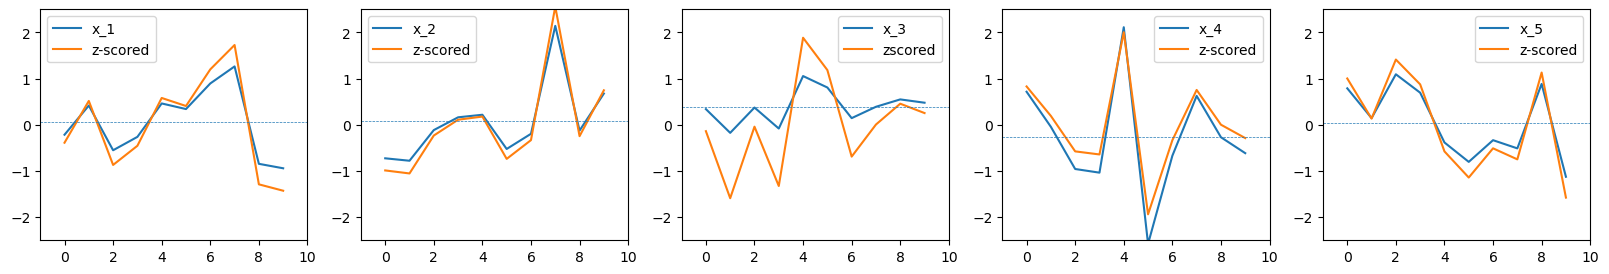

In [50]:
plt.figure(figsize=(20,3))

plt.subplot(151)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_1, label='x_1')
plt.plot(x1_zscored, label='z-scored')
plt.axhline(y = np.mean(x_1), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(152)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_2, label='x_2')
plt.plot(x2_zscored, label='z-scored')
plt.axhline(y = np.mean(x_2), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(153)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_3, label='x_3')
plt.plot(x3_zscored, label='zscored')
plt.axhline(y = np.mean(x_3), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(154)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_4, label='x_4')
plt.plot(x4_zscored, label='z-scored')
plt.axhline(y = np.mean(x_4), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(155)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_5, label='x_5')
plt.plot(x5_zscored, label='z-scored')
plt.axhline(y = np.mean(x_5), linewidth=0.5, linestyle='--')
plt.legend()

plt.show()

In [222]:
# Own implementation of a gaussian distribution

N = 100
x = np.linspace(-10,10,N)
mu, sigma = 0,1

def gaussian(x, mu, sigma):
    '''
    Parameters
    ----------
    x: an array of points at which to evaluate the Gaussian function
    mu : mean
    sigma : standard deviation

    Returns
    -------
    p : probability

    '''    
    p = (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-(1/2)*((x-mu)**2/sigma**2))
    return p

p = gaussian(x, mu, sigma)

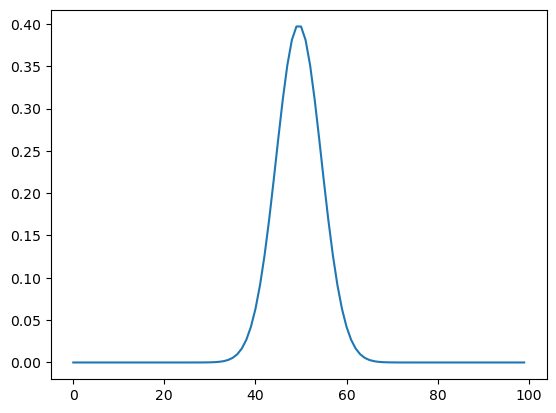

In [223]:
plt.plot(p)

# Multivariate case

In [224]:
def getCovN2(sigma1, sigma2, rho):
    cov = np.array([[sigma1**2, rho*sigma1*sigma2], [rho*sigma2*sigma1, sigma2**2]])
    return cov

mu = np.array([10, -1])
sigma1 = 2
sigma2 = 1

In [231]:
# # Own implementation:

# N = 100
# p = (2*np.pi)**(-D/2) * np.linalg.norm(cov)**(-1/2)*np.e**(-1/2(x-x_bar).T*C**(-1)*(x-x_bar))

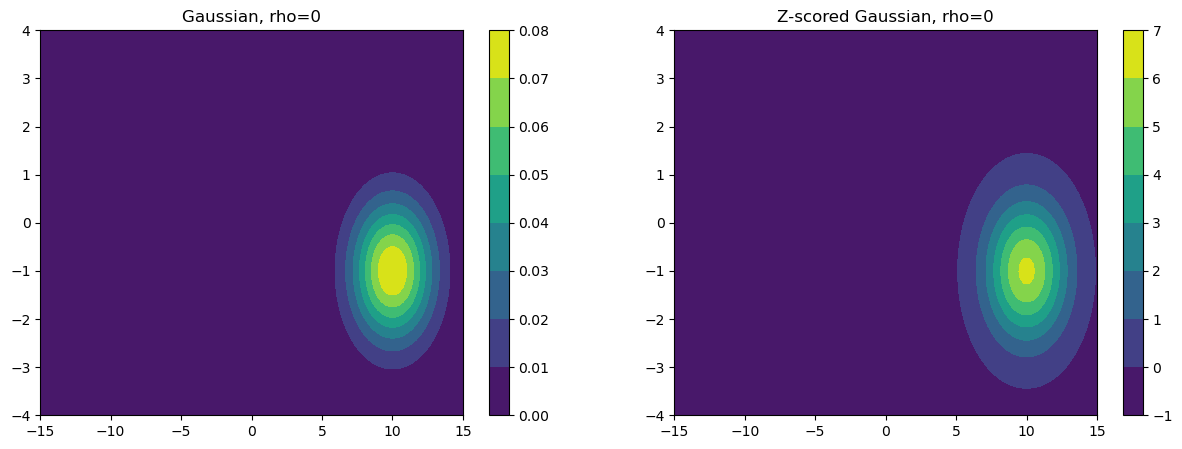

In [204]:
'''
No correlation
'''
rho = 0
N = 100

def multivariateGaussian(mu, sigma1, sigma2, rho, cov, N):
    x, y = np.meshgrid(np.linspace(-mu[0]-5,mu[0]+5,N), np.linspace(-mu[1]-5,mu[1]+5,N))
    
    pos = np.empty(x.shape + (2,)) # shape (N, N, 2)
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    rv = stats.multivariate_normal(mu, cov)
    z = rv.pdf(pos)
    
    return x, y, z

cov = getCovN2(sigma1, sigma2, rho)
x, y, z = multivariateGaussian(mu, sigma1, sigma2, rho, cov, N)

z_zscored = (z - np.mean(z)) / np.std(z)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title(f'Gaussian, rho={rho}')
plt.contourf(x, y, z)
plt.colorbar()

plt.subplot(122)
plt.title(f'Z-scored Gaussian, rho={rho}')
plt.contourf(x, y, z_zscored)
plt.colorbar()
plt.show()

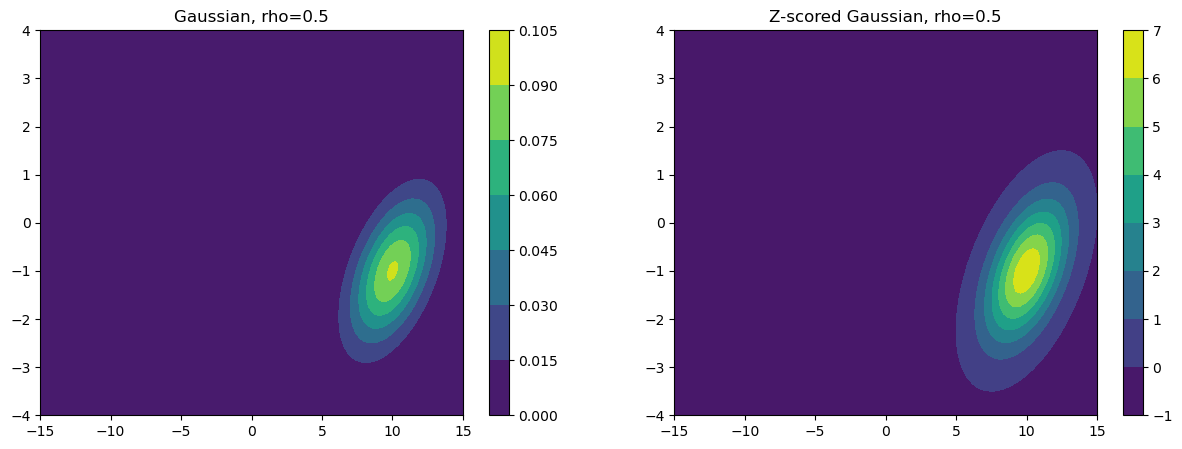

In [201]:
'''
Correlation = 0.5
'''

rho = 0.5
N = 100

cov = getCovN2(sigma1, sigma2, rho)
x, y, z = multivariateGaussian(mu, sigma1, sigma2, rho, cov, N)

z_zscored = (z - np.mean(z)) / np.std(z)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title(f'Gaussian, rho={rho}')
plt.contourf(x, y, z)
plt.colorbar()

plt.subplot(122)
plt.title(f'Z-scored Gaussian, rho={rho}')
plt.contourf(x, y, z_zscored)
plt.colorbar()
plt.show()

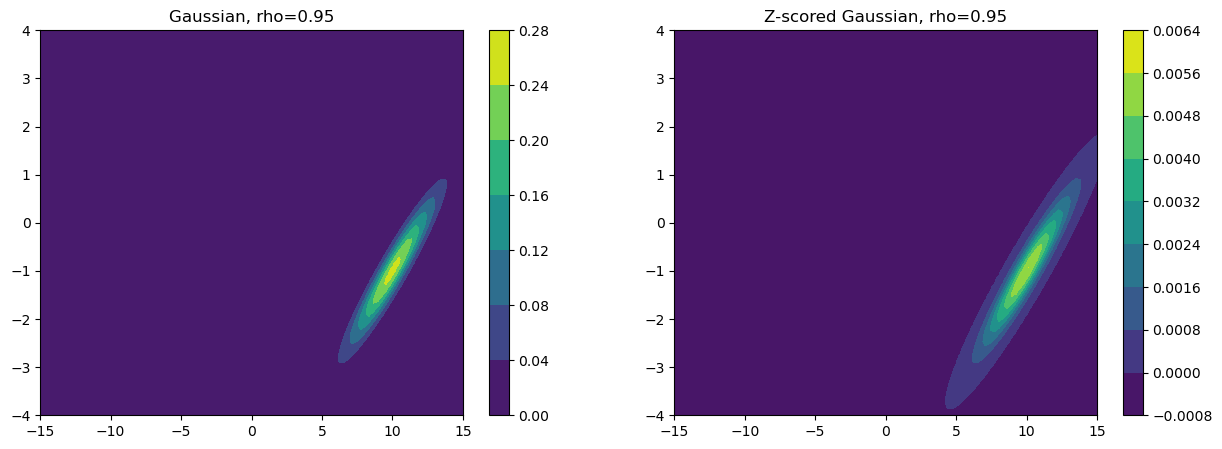

In [215]:
'''
Correlation = 0.95
'''
rho = 0.95
N = 100

cov = getCovN2(sigma1, sigma2, rho)
x, y, z = multivariateGaussian(mu, sigma1, sigma2, rho, cov, N)

z_zscored = (z - np.mean(z)) * np.std(z)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title(f'Gaussian, rho={rho}')
plt.contourf(x, y, z)
plt.colorbar()

plt.subplot(122)
plt.title(f'Z-scored Gaussian, rho={rho}')
plt.contourf(x, y, z_zscored)
plt.colorbar()
plt.show()

# Discussion

I didn't manage to complete this assignment, but I can attempt to lay out the difficulties of it:

In the 1D case, z-scoring consists of subtracting the sample mean and dividing by the sample standard deviation, which are both scalars.

$$
z^{t} = \frac{x^{t} - \bar{x}}{\sigma_x}
$$

In the multidimensional case, in order to not lose information, you have to find a way to incorporate the covariance matrix, because the standard deviation/variance alone does not account for the correlation. In addition, $\bar{x}$ is now a mean vector, and we have another set of means, $\bar{y}$. Because the covariance matrix is symmetric and positive definite, it is invertible, so instead of dividing we can multiply by its inverse.

$$
z^{t} = (x^{t} - \bar{x})(y^{t} - \bar{y}) \times \Sigma^{-1}
$$